In [197]:
import requests

r = requests.get("https://www.csie.ntu.edu.tw/~cjlin/libsvmtools/datasets/binary/a9a")

In [198]:
from io import BytesIO
from sklearn.datasets import load_svmlight_file

X, y = load_svmlight_file(f=BytesIO(r.content), n_features=123)
X = X.toarray()

In [199]:
import numpy

n_samples, n_features = X.shape
X = numpy.column_stack((X, numpy.ones((n_samples, 1))))
y = y.reshape((-1, 1))

In [200]:
from sklearn.model_selection import train_test_split

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.5)

In [201]:
train_samples,train_features=X_train.shape
batch_size=100
max_epoch = 10000
learning_rate = 0.001
C = 0.5

losses_train = []
losses_val = []

In [202]:
# w = numpy.zeros((n_features + 1, 1))  # initialize with zeros
w = numpy.random.random((n_features + 1, 1))  # initialize with random numbers
# w = numpy.random.normal(0.1, 0.1, size=(n_features + 1, 1))  # initialize with zero normal distribution

In [203]:
#MBGD for linear classification
for epoch in range(max_epoch):
    Batch_X_train = numpy.zeros((batch_size,train_features))
    h = numpy.zeros((batch_size,1))
    y_hat = numpy.zeros((batch_size,1))
    for i in range(batch_size):
        rand_sample = numpy.random.randint(0,train_samples,1)
        Batch_X_train[i] = X_train[rand_sample]
        h[i] = 1 - y_train[rand_sample] * numpy.dot(X_train[rand_sample], w)
        y_hat[[i],:] = numpy.where(h > 0, y_train[rand_sample], 0).reshape((1,1))
    w -= learning_rate * (w - C * numpy.dot(Batch_X_train.transpose(), y_hat))

    y_predict_train = numpy.where(numpy.dot(X_train, w) > 0, 1, -1)
    loss_train = numpy.sum(w * w) + C * numpy.sum(numpy.maximum(1 - y_train * numpy.dot(X_train, w), 0))
    losses_train.append(loss_train / y_train.size)

    y_predict_val = numpy.where(numpy.dot(X_val, w) > 0, 1, -1)
    loss_val = numpy.sum(w * w) + C * numpy.sum(numpy.maximum(1 - y_val * numpy.dot(X_val, w), 0))
    losses_val.append(loss_val/y_val.size)

ValueError: cannot reshape array of size 100 into shape (1,1)

In [160]:
from sklearn.metrics import classification_report

print(classification_report(y_val, numpy.where(numpy.dot(X_val, w) > 0, 1, -1),
                            target_names=["positive", "negative"], digits=4))

              precision    recall  f1-score   support

    positive     0.0000    0.0000    0.0000     12386
    negative     0.2392    1.0000    0.3861      3895

    accuracy                         0.2392     16281
   macro avg     0.1196    0.5000    0.1931     16281
weighted avg     0.0572    0.2392    0.0924     16281



Text(0.5, 1.0, 'The graph of loss value varing with the number of iterations')

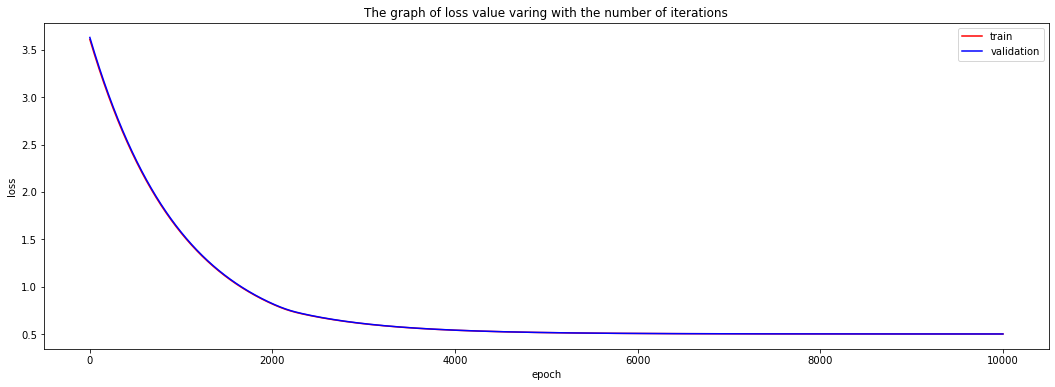

In [161]:
%matplotlib inline
import matplotlib.pyplot as plt

plt.figure(figsize=(18, 6))
plt.plot(losses_train, color="r", label="train")
plt.plot(losses_val, color="b", label="validation")
plt.legend()
plt.xlabel("epoch")
plt.ylabel("loss")
plt.title("The graph of loss value varing with the number of iterations")